# EQUITY DIGITAL ASSET-OR-NOTHING EUROPEAN OPTION

Valuation and Risk of Equity Digital Options that have their barrier observed at expiry only.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

# Asset-or-Nothing Digital Option

I define a digital call and a digital put option.

In [23]:
underlying_type = FinDigitalOptionTypes.ASSET_OR_NOTHING

In [24]:
expiry_date = Date(1, 1, 2008)

In [25]:
strike_price = 65.0

In [26]:
digitalCall = EquityDigitalOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL, underlying_type)

In [27]:
digitalPut = EquityDigitalOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT, underlying_type)

In [28]:
print(digitalCall)

OBJECT TYPE: EquityDigitalOption
EXPIRY DATE: 01-JAN-2008
BARRIER LEVEL: 65.0
OPTION TYPE: OptionTypes.EUROPEAN_CALL
UNDERLYING TYPE: FinDigitalOptionTypes.ASSET_OR_NOTHING


In [29]:
print(digitalPut)

OBJECT TYPE: EquityDigitalOption
EXPIRY DATE: 01-JAN-2008
BARRIER LEVEL: 65.0
OPTION TYPE: OptionTypes.EUROPEAN_PUT
UNDERLYING TYPE: FinDigitalOptionTypes.ASSET_OR_NOTHING


## Valuation

In [30]:
valuation_date = Date(1, 7, 2007)

In [31]:
interest_rate = 0.07

In [32]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [33]:
volatility = 0.27

In [34]:
model = BlackScholes(volatility)

In [35]:
stock_price = 70.0
dividend_yield = 0.05

In [36]:
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

In [37]:
digitalCall.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

48.03177217466735

In [38]:
digitalPut.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

20.2258946782528

## Check Monte-Carlo

In [39]:
digitalCall.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, model, 50000)

48.072486273604504

In [40]:
digitalPut.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, model, 50000)

20.186613355023177

## Vectorisations

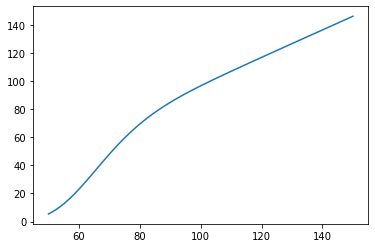

In [41]:
stock_prices = np.linspace(50,150,100)
v = digitalCall.value(valuation_date, stock_prices, discount_curve, dividend_curve, model)
plt.plot(stock_prices, v);

And we can do the same to the option delta.

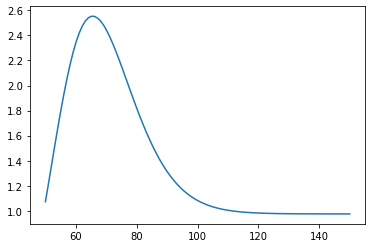

In [49]:
stock_prices = np.linspace(50,150,100)
v = digitalCall.delta(valuation_date, stock_prices, discount_curve, dividend_curve, model)
plt.plot(stock_prices, v);

## Risk Analysis

The analytical model produced the following sensitivities

In [26]:
digitalCall.delta(valuation_date, stock_price, discount_curve, dividend_curve, model)

2.4448134812615763

In [27]:
digitalCall.gamma(valuation_date, stock_price, discount_curve, dividend_curve, model)

-0.044992987113801064

In [28]:
digitalCall.theta(valuation_date, stock_price, discount_curve, dividend_curve, model)

8.00792731368869

In [29]:
digitalCall.vega(valuation_date, stock_price, discount_curve, dividend_curve, model)

-29.995040553885133

In [30]:
digitalCall.rho(valuation_date, stock_price, discount_curve, dividend_curve, model)

62.05421155549118

Copyright (c) 2020 Dominic O'Kane